# Wjet Signal Region Shape Extraction Using Alpha Ratio Method

1. Calculate alpha using MC only
    1. Ratio of signal to side-band region
1. Get 1-sigma up/down alpha shape by varying the fit parameters by 1 sigma.
1. Grab corrected W+jet shape and normalization in side-band region from background estimation code.
1. Using alpha get the W+jet shape and normalization in signal region
1. Also, grab the corrected W+jet shape and its up/down from wjet fit parameters.

In [ ]:
import ROOT as r

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

import CMS_lumi, tdrstyle

tdrstyle.setTDRStyle()

In [ ]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")

treeIn = fin.Get("otree")

# Define the cuts
cutString_SideBand       =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>105)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Signal         =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) &&(PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

## Get W+jet histogram in signal, as well as side band region

In [ ]:
hSignal_4bin = r.TH1D("hSignal_4bin","",4,600,2500)
hSignal_4bin.SetMarkerColor(1)
hSignal_4bin.SetLineColor(1)
hSignal_4bin.SetLineWidth(3)
hSignal_4bin.SetMarkerSize(1)

hSignal_15bin = r.TH1D("hSignal_15bin","",15,600,2500)
hSignal_15bin.SetMarkerColor(1)
hSignal_15bin.SetLineColor(1)
hSignal_15bin.SetLineWidth(3)
hSignal_15bin.SetMarkerSize(1)

hSignal_38bin = r.TH1D("hSignal_38bin","",38,600,2500)
hSignal_38bin.SetMarkerColor(1)
hSignal_38bin.SetLineColor(1)
hSignal_38bin.SetLineWidth(3)
hSignal_38bin.SetMarkerSize(1)

hSideBand_15bin = r.TH1D("hSideBand_15bin","",15,600,2500)
hSideBand_15bin.SetMarkerColor(2)
hSideBand_15bin.SetLineColor(2)
hSideBand_15bin.SetLineWidth(3)
hSideBand_15bin.SetMarkerSize(1)

hSideBand_38bin = r.TH1D("hSideBand_38bin","",38,600,2500)
hSideBand_38bin.SetMarkerColor(2)
hSideBand_38bin.SetLineColor(2)
hSideBand_38bin.SetLineWidth(3)
hSideBand_38bin.SetMarkerSize(1)

treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_4bin",cutString_Signal)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_15bin",cutString_Signal)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_38bin",cutString_Signal)

treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSideBand_15bin",cutString_SideBand)
treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSideBand_38bin",cutString_SideBand)

### Plot the Wjet histogram in signal region and side-band region

In [ ]:
leg = r.TLegend(0.45,0.95,.95,0.75)

leg.AddEntry(hSignal_15bin,"signal region (MC)")
leg.AddEntry(hSideBand_15bin,"SideBand Region (MC)")


c1 = r.TCanvas("c1", "canvas", 1000, 600)
c1.SetLogy()
c1.Divide(2,1)
c1.cd(1)
r.gPad.SetLogy()
hSignal_15bin.SetTitle("Log axis")
hSignal_15bin.Draw()
hSideBand_15bin.Draw("same")
leg.Draw()
c1.cd(2)
hSignal_15bin.SetTitle("Linear axis")
hSignal_15bin.Draw()
hSideBand_15bin.Draw("same")
leg.Draw()

c1.Draw()

# Part-I

## Calculate alpha 

> by dividing W+jets MC in signal and side-band region


> fit the alpha

In [ ]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",15,600,2500)
Alpha = hSignal_15bin.Clone()
Alpha.Divide(hSideBand_15bin)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("mWW (GeV)")
Alpha.GetYaxis().SetTitle("alpha (Signal/Side-band)")
Alpha.SetMaximum(1.8)
Alpha.SetMinimum(-0.2)
Alpha.Draw()
f1 = r.TF1("f1","pol1",600,2500)
Alpha.Fit("f1")
c1.Draw()
print "Integral = ",Alpha.Integral("width")
print "Integral = ",f1.Integral(600,2500)
#for i in range(1,39):
#    print i,",",Alpha.GetBinContent(i),",",Alpha.GetBinLowEdge(i),",",Alpha.GetBinWidth(i)

## Convert TF1 of alpha to histogram of 38 bins

Print alpha values in each bin: 


1 	600 650 => 625.0 0.997064222805
2 	650 700 => 675.0 0.972340098607
3 	700 750 => 725.0 0.947615974409
4 	750 800 => 775.0 0.92289185021
5 	800 850 => 825.0 0.898167726012
6 	850 900 => 875.0 0.873443601814
7 	900 950 => 925.0 0.848719477616
8 	950 1000 => 975.0 0.823995353417
9 	1000 1050 => 1025.0 0.799271229219
10 	1050 1100 => 1075.0 0.774547105021
11 	1100 1150 => 1125.0 0.749822980823
12 	1150 1200 => 1175.0 0.725098856624
13 	1200 1250 => 1225.0 0.700374732426
14 	1250 1300 => 1275.0 0.675650608228
15 	1300 1350 => 1325.0 0.65092648403
16 	1350 1400 => 1375.0 0.626202359831
17 	1400 1450 => 1425.0 0.601478235633
18 	1450 1500 => 1475.0 0.576754111435
19 	1500 1550 => 1525.0 0.552029987237
20 	1550 1600 => 1575.0 0.527305863038
21 	1600 1650 => 1625.0 0.50258173884
22 	1650 1700 => 1675.0 0.477857614642
23 	1700 1750 => 1725.0 0.453133490444
24 	1750 1800 => 1775.0 0.428409366245
25 	1800 1850 => 1825.0 0.403685242047
26 	1850 1900 => 1875.0 0

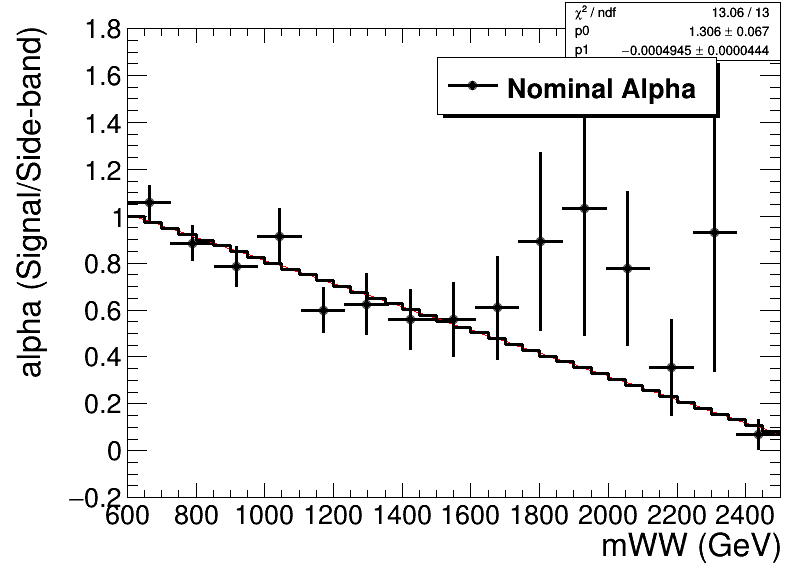

In [6]:
leg = r.TLegend(0.55,0.9,.9,0.8)

hAlpha_Fit_38bin = r.TH1F("hAlpha_Fit_38bin","",38,600,2500)
count = 1
import numpy as np
print "Print alpha values in each bin: \n\n"
for i in np.arange(600,2500,50):
    print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_38bin.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1

hAlpha_Fit_38bin.SetMarkerColor(1)
hAlpha_Fit_38bin.SetLineColor(1)
hAlpha_Fit_38bin.SetLineWidth(3)
hAlpha_Fit_38bin.SetMarkerSize(1)


leg.AddEntry(hAlpha_Fit_38bin,"Nominal Alpha")
hAlpha_Fit_38bin.Draw("same")    
    
leg.Draw()

c1.Update()
c1.Draw()

## Get alpha 1-sigma Up

In [7]:
print "Parameter 1 = ",f1.GetParameter(0),"+/-",f1.GetParError(0)
print "Parameter 2 = ",f1.GetParameter(1),"+/-",f1.GetParError(1)

f1.SetParameter(0,f1.GetParameter(0)+f1.GetParError(0))
f1.SetParameter(1,f1.GetParameter(1)+f1.GetParError(1))

Parameter 1 =  1.30611577528 +/- 0.0672873010565
Parameter 2 =  -0.000494482483965 +/- 4.43990415465e-05


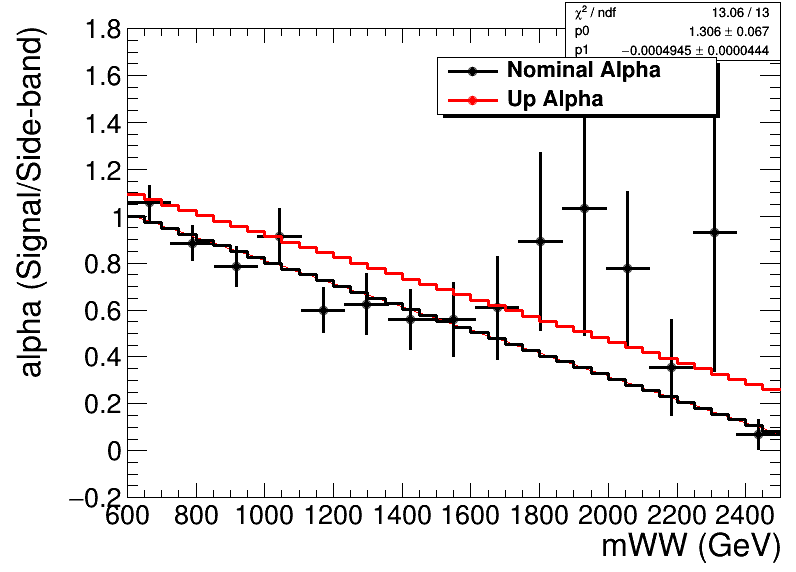

In [8]:
hAlpha_Fit_up = r.TH1F("hAlpha_Fit_up","",38,600,2500)

import numpy as np
count=1
for i in np.arange(600,2500,50):
    #print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_up.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1
    
hAlpha_Fit_up.SetMarkerColor(2)
hAlpha_Fit_up.SetLineColor(2)
#hAlpha_Fit.SetFillColor(1)
hAlpha_Fit_up.SetLineWidth(3)
hAlpha_Fit_up.SetMarkerSize(1)
leg.AddEntry(hAlpha_Fit_up,"Up Alpha")
hAlpha_Fit_up.Draw("same")
c1.Update()
c1.Draw()

## Get alpha 1-sigma Down

> Below to get 1-sigma down we need to multiply by 2 because earlier we add 1-sigma for getting 1-sigma up distribution for alpha

In [9]:
f1.SetParameter(0,f1.GetParameter(0)-2*f1.GetParError(0))
f1.SetParameter(1,f1.GetParameter(1)-2*f1.GetParError(1))

Info in <TCanvas::Print>: png file WV_Alpha_Nom_Up_Down_Fit.png has been created
Info in <TCanvas::Print>: pdf file WV_Alpha_Nom_Up_Down_Fit.pdf has been created


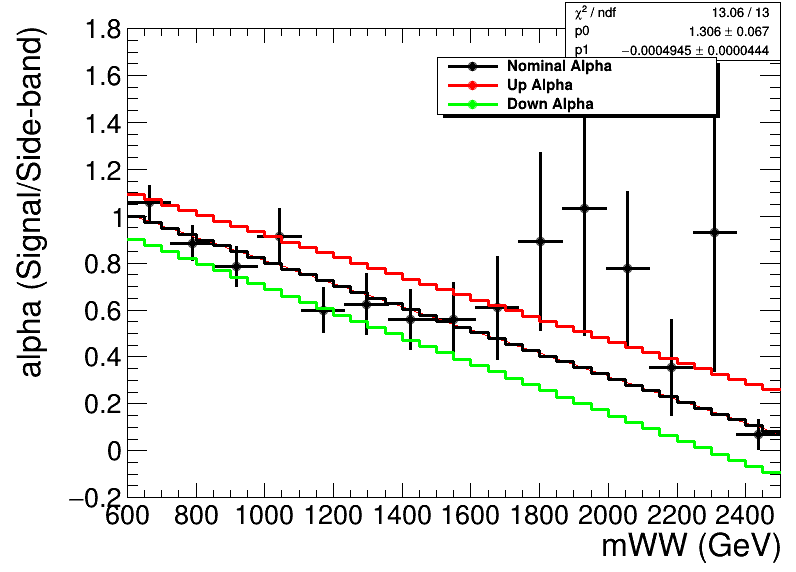

In [10]:
hAlpha_Fit_dn = r.TH1F("hAlpha_Fit_dn","",38,600,2500)

count=1
import numpy as np
for i in np.arange(600,2500,50):
    #print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_dn.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1
    

hAlpha_Fit_dn.SetMarkerColor(3)
hAlpha_Fit_dn.SetLineColor(3)
#hAlpha_Fit_dn.SetFillColor(1)
hAlpha_Fit_dn.SetLineWidth(3)
hAlpha_Fit_dn.SetMarkerSize(1)
leg.AddEntry(hAlpha_Fit_dn,"Down Alpha")
hAlpha_Fit_dn.Draw("same")
leg.Draw()
c1.Update()
c1.SaveAs("WV_Alpha_Nom_Up_Down_Fit.png")
c1.SaveAs("WV_Alpha_Nom_Up_Down_Fit.pdf")
c1.Draw()

### Get Back to nominal alpha

In [11]:
f1.SetParameter(0,f1.GetParameter(0)+1*f1.GetParError(0))
f1.SetParameter(1,f1.GetParameter(1)+1*f1.GetParError(1))

print "Parameter 1 = ",f1.GetParameter(0),"+/-",f1.GetParError(0)
print "Parameter 2 = ",f1.GetParameter(1),"+/-",f1.GetParError(1)

Parameter 1 =  1.30611577528 +/- 0.0672873010565
Parameter 2 =  -0.000494482483965 +/- 4.43990415465e-05


# Get corrected W+jet in sideband region after fit to data (From Background Estimation Code)

This histogram is saved in ExoVV fitter using create histogram method:

https://github.com/ram1123/EXOVVFitter/blob/master/g1_exo_doFit_class_new.py#L1795-L1796

But, this histogram was not taking the normalization so I have to scale it with the normalization. ***But, scaling the histogram also scales the errors.***

263.901180837


Info in <TCanvas::Print>: png file WV_SideBandRegion_Comparison_MC_vs_Corr.png has been created
Info in <TCanvas::Print>: pdf file WV_SideBandRegion_Comparison_MC_vs_Corr.pdf has been created


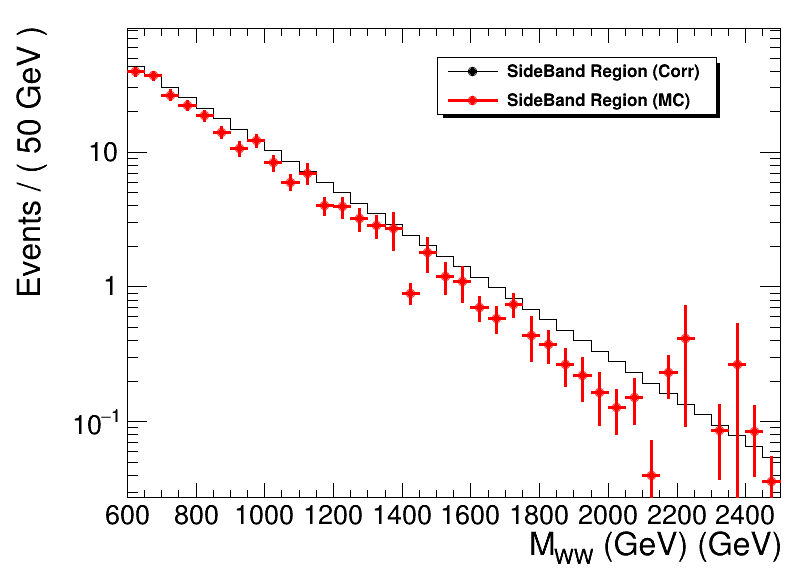

In [12]:
leg.Clear()
c1.Clear()

Wjet_file = r.TFile.Open("WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22_BothLSBUSB_UpDownVarWjet_WV/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")

Wjet_hist = r.TH1F()
Wjet_hist = Wjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
Wjet_hist.Scale(264.26)
print Wjet_hist.Integral()
#Wjet_hist.SetMaximum(150)
Wjet_hist.Draw("hist")
hSideBand_38bin.Draw("same")
leg.AddEntry(Wjet_hist,"SideBand Region (Corr)")
leg.AddEntry(hSideBand_38bin,"SideBand Region (MC)")
leg.Draw()
c1.SetLogy()
c1.Draw()
c1.SaveAs("WV_SideBandRegion_Comparison_MC_vs_Corr.png")
c1.SaveAs("WV_SideBandRegion_Comparison_MC_vs_Corr.pdf")

# Multiplication by Alpha to get Signal Region W+jets obtained from data.

Wjet yield =  230.423743119
Bin 0 content =  43.5238800049
Bin 2 content =  35.4311752319
Bin 3 content =  28.8245544434
Bin 4 content =  23.4338665009
********************
MC bin contents: 

Bin 0 content =  183.380051662
Bin 2 content =  19.5358206203
Bin 3 content =  3.16529153612
Bin 4 content =  0.526633166523


Warning in <TFile::Append>: Replacing existing TH1: hModel_Sig (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hModel_Sig (Potential memory leak).
Info in <TCanvas::Print>: png file WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha.png has been created
Info in <TCanvas::Print>: pdf file WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha.pdf has been created


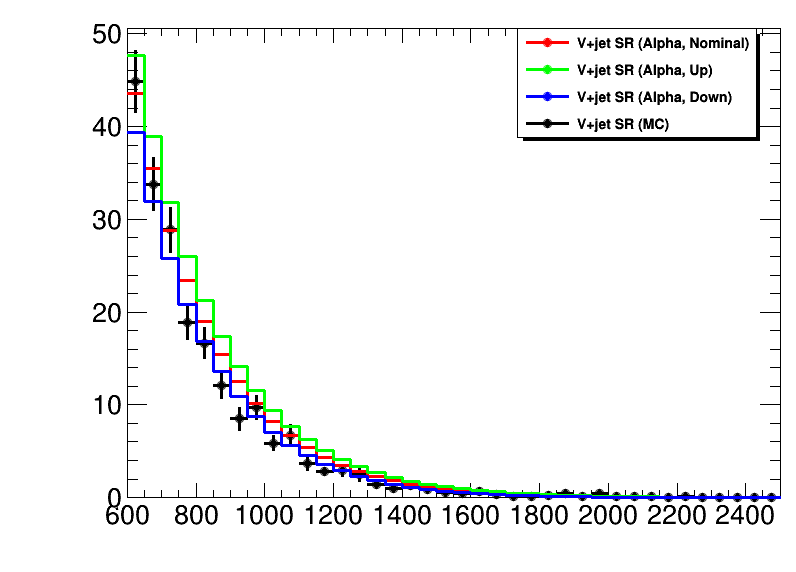

In [13]:
c1.Clear()
leg = r.TLegend(0.65,0.95,.95,0.76)


hModel_Sig = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(2)
hModel_Sig.SetLineColor(2)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))

leg.AddEntry(hModel_Sig,"V+jet SR (Alpha, Nominal)")

#hModel_Sig.SaveAs("WVjet_Corr_AlphaShape_Nominal_38bins.root")


hModel_Sig_up = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig_up.Sumw2()
hModel_Sig_up.SetMarkerColor(3)
hModel_Sig_up.SetLineColor(3)
hModel_Sig_up.SetLineWidth(3)
hModel_Sig_up.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig_up.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_up.GetBinContent(i))

leg.AddEntry(hModel_Sig_up,"V+jet SR (Alpha, Up)")

#hModel_Sig_up.SaveAs("WVjet_Corr_AlphaShape_Up_38bins.root")

hModel_Sig_Down = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig_Down.Sumw2()
hModel_Sig_Down.SetMarkerColor(4)
hModel_Sig_Down.SetLineColor(4)
hModel_Sig_Down.SetLineWidth(3)
hModel_Sig_Down.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig_Down.SetBinContent(i,Wjet_hist.GetBinContent(i)*hAlpha_Fit_dn.GetBinContent(i))

leg.AddEntry(hModel_Sig_Down,"V+jet SR (Alpha, Down)")



#hModel_Sig_Down.SaveAs("WVjet_Corr_AlphaShape_Down_38bins.root")




#hModel_Sig
hSignal_38bin.Draw()
hModel_Sig.Draw("same")
hModel_Sig_up.Draw("same")
hModel_Sig_Down.Draw("same")

leg.AddEntry(hSignal_4bin,"V+jet SR (MC)")


leg.Draw()

print "Wjet yield = ", hModel_Sig.Integral()

print "Bin 0 content = ",hModel_Sig.GetBinContent(1)
print "Bin 2 content = ",hModel_Sig.GetBinContent(2)
print "Bin 3 content = ",hModel_Sig.GetBinContent(3)
print "Bin 4 content = ",hModel_Sig.GetBinContent(4)
print "*"*20
print "MC bin contents: \n"
print "Bin 0 content = ",hSignal_4bin.GetBinContent(1)
print "Bin 2 content = ",hSignal_4bin.GetBinContent(2)
print "Bin 3 content = ",hSignal_4bin.GetBinContent(3)
print "Bin 4 content = ",hSignal_4bin.GetBinContent(4)
c1.SetLogy(0)
c1.Draw()
c1.SaveAs("WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha.png")
c1.SaveAs("WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha.pdf")

Info in <TH1F::SaveAs>: ROOT file WVjet_Corr_AlphaShape_Nominal_4bins.root has been created
Info in <TH1F::SaveAs>: ROOT file WVjet_Corr_AlphaShape_Up_4bins.root has been created
Info in <TH1F::SaveAs>: ROOT file WVjet_Corr_AlphaShape_Down_4bins.root has been created
Info in <TCanvas::Print>: png file WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha_4bins.png has been created
Info in <TCanvas::Print>: pdf file WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha_4bins.pdf has been created


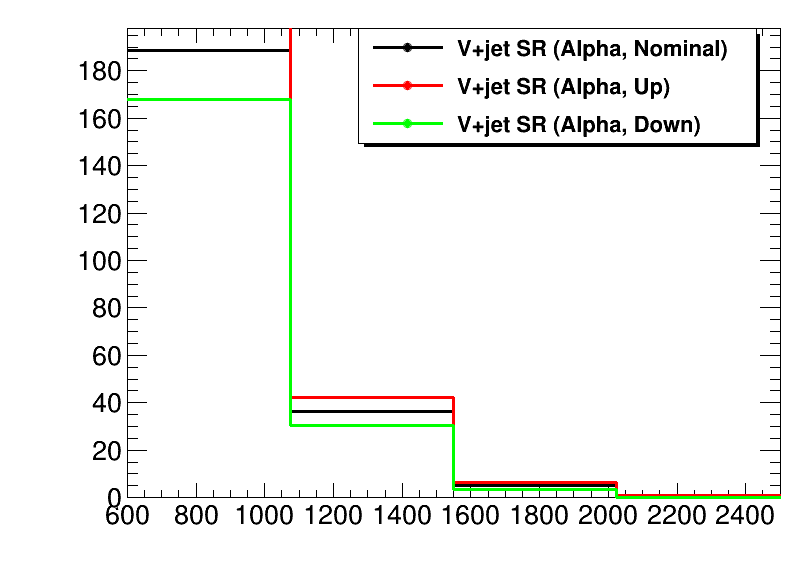

In [14]:
leg = r.TLegend(0.45,0.95,.95,0.75)

hModel_Sig_new = r.TH1F("hModel_Sig_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig.GetBinContent(i)
    bin[count] += hModel_Sig.GetBinContent(i)

hModel_Sig_new.SetBinContent(1,bin[1])
hModel_Sig_new.SetBinContent(2,bin[2])
hModel_Sig_new.SetBinContent(3,bin[3])
hModel_Sig_new.SetBinContent(4,bin[4])

hModel_Sig_new.SetMarkerColor(1)
hModel_Sig_new.SetLineColor(1)
hModel_Sig_new.SetLineWidth(3)
hModel_Sig_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_new,"V+jet SR (Alpha, Nominal)")
hModel_Sig_new.SaveAs("WVjet_Corr_AlphaShape_Nominal_4bins.root")

#########################################################
hModel_Sig_up_new = r.TH1F("hModel_Sig_up_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig_up.GetBinContent(i)
    bin[count] += hModel_Sig_up.GetBinContent(i)

hModel_Sig_up_new.SetBinContent(1,bin[1])
hModel_Sig_up_new.SetBinContent(2,bin[2])
hModel_Sig_up_new.SetBinContent(3,bin[3])
hModel_Sig_up_new.SetBinContent(4,bin[4])

hModel_Sig_up_new.SetMarkerColor(2)
hModel_Sig_up_new.SetLineColor(2)
hModel_Sig_up_new.SetLineWidth(3)
hModel_Sig_up_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_up_new,"V+jet SR (Alpha, Up)")

    
hModel_Sig_up_new.SaveAs("WVjet_Corr_AlphaShape_Up_4bins.root")

#########################################################
hModel_Sig_Down_new = r.TH1F("hModel_Sig_Down_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig_Down.GetBinContent(i)
    bin[count] += hModel_Sig_Down.GetBinContent(i)

hModel_Sig_Down_new.SetBinContent(1,bin[1])
hModel_Sig_Down_new.SetBinContent(2,bin[2])
hModel_Sig_Down_new.SetBinContent(3,bin[3])
hModel_Sig_Down_new.SetBinContent(4,bin[4])

hModel_Sig_Down_new.SetMarkerColor(3)
hModel_Sig_Down_new.SetLineColor(3)
hModel_Sig_Down_new.SetLineWidth(3)
hModel_Sig_Down_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_Down_new,"V+jet SR (Alpha, Down)")

hModel_Sig_Down_new.SaveAs("WVjet_Corr_AlphaShape_Down_4bins.root")

c1.Clear()
hModel_Sig_new.Draw()
hModel_Sig_up_new.Draw("same")
hModel_Sig_Down_new.Draw("same")
leg.Draw()
c1.Draw()
c1.SaveAs("WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha_4bins.png")
c1.SaveAs("WV_SignalRegion_Wjet_UpDown_BecauseOfAlpha_4bins.pdf")

In [15]:
c1.Clear()
fin_Wjet_MC = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")
fin_VV = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VV.root")
fin_TTbar = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_TTbar.root")
fin_STop = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_STop.root")
fin_Data = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_data_golden.root")

treeIn_Wjet_MC = fin_Wjet_MC.Get("otree")
treeIn_VV = fin_VV.Get("otree")
treeIn_TTbar = fin_TTbar.Get("otree")
treeIn_STop = fin_STop.Get("otree")
treeIn_Data = fin_Data.Get("otree")

# Data/MC with 38 bins

In [16]:
# For 38 bins
hModel_Sig.SetMarkerColor(r.TColor.GetColor(222,90,106))
hModel_Sig.SetLineColor(r.TColor.GetColor(222,90,106))
hModel_Sig.SetFillColor(r.TColor.GetColor(222,90,106))
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(1)

hWjets_MC = r.TH1D("hWjets_MC","",38,600,2500)
hWjets_MC.SetMarkerColor(r.TColor.GetColor(250,202,255))
hWjets_MC.SetLineColor(r.TColor.GetColor(250,202,255))
hWjets_MC.SetFillColor(r.TColor.GetColor(250,202,255))
hWjets_MC.SetLineWidth(3)
hWjets_MC.SetMarkerSize(1)

hVV = r.TH1D("hVV","",38,600,2500)
hVV.SetMarkerColor(r.TColor.GetColor(250,202,255))
hVV.SetLineColor(r.TColor.GetColor(250,202,255))
hVV.SetFillColor(r.TColor.GetColor(250,202,255))
hVV.SetLineWidth(3)
hVV.SetMarkerSize(1)

hTTbar = r.TH1D("hTTbar","",38,600,2500)
hTTbar.SetMarkerColor(r.TColor.GetColor(155,152,204))
hTTbar.SetLineColor(r.TColor.GetColor(155,152,204))
hTTbar.SetFillColor(r.TColor.GetColor(155,152,204))
hTTbar.SetLineWidth(3)
hTTbar.SetMarkerSize(1)

hSTop = r.TH1D("hSTop","",38,600,2500)
hSTop.SetMarkerColor(r.TColor.GetColor(0,84,159))
hSTop.SetLineColor(r.TColor.GetColor(0,84,159))
hSTop.SetFillColor(r.TColor.GetColor(0,84,159))
hSTop.SetLineWidth(3)
hSTop.SetMarkerSize(1)

hData = r.TH1D("hData","",38,600,2500)
hData.SetMarkerColor(1)
hData.SetLineColor(1)
#hData.SetFillColor(1)
hData.SetLineWidth(3)
hData.SetMarkerSize(1)

treeIn_Wjet_MC.Draw("mass_lvj_type0_PuppiAK8>>hWjets_MC",cutString_SideBand)
treeIn_VV.Draw("mass_lvj_type0_PuppiAK8>>hVV",cutString_SideBand)
treeIn_TTbar.Draw("mass_lvj_type0_PuppiAK8>>hTTbar",cutString_SideBand)
treeIn_STop.Draw("mass_lvj_type0_PuppiAK8>>hSTop",cutString_SideBand)

#cutString_SigData =  "((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so_corr>55) && (PuppiAK8_jet_mass_so_corr<65)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_SigData_Data =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) && (PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_SideBand_Data =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>105)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_Lower_SideBand_Data =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"




treeIn_Data.Draw("mass_lvj_type0_PuppiAK8>>hData",cutString_SideBand_Data)

343L

In [17]:
leg = r.TLegend(0.55,0.95,.90,0.72)

stack = r.THStack()

stack.Add(hSTop,"F")
stack.Add(hTTbar,"F")
stack.Add(hVV,"F")
stack.Add(hModel_Sig,"F")
#stack.Add(hModel_Sig_new,"F")

leg.AddEntry(hSTop,"STop")
leg.AddEntry(hTTbar,"TTbar")
leg.AddEntry(hVV,"Diboson")
leg.AddEntry(hModel_Sig,"Vjets")
#leg.AddEntry(hModel_Sig_new,"Wjets")
leg.AddEntry(hData,"Data")



#stack.SetMinimum(0.001)
stack.SetMaximum(90.0)
#stack.SetMaximum(400.0)

#stack.Draw("hist")
#hData.Draw("same hist")
#leg.Draw()
#c1.Draw()

35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 16 points have been skipped
Info in <TCanvas::Print>: png file WV_Cross_Check_DataMC_WithWjet_Corr_38bins.png has been created
Info in <TCanvas::Print>: pdf file WV_Cross_Check_DataMC_WithWjet_Corr_38bins.pdf has been created


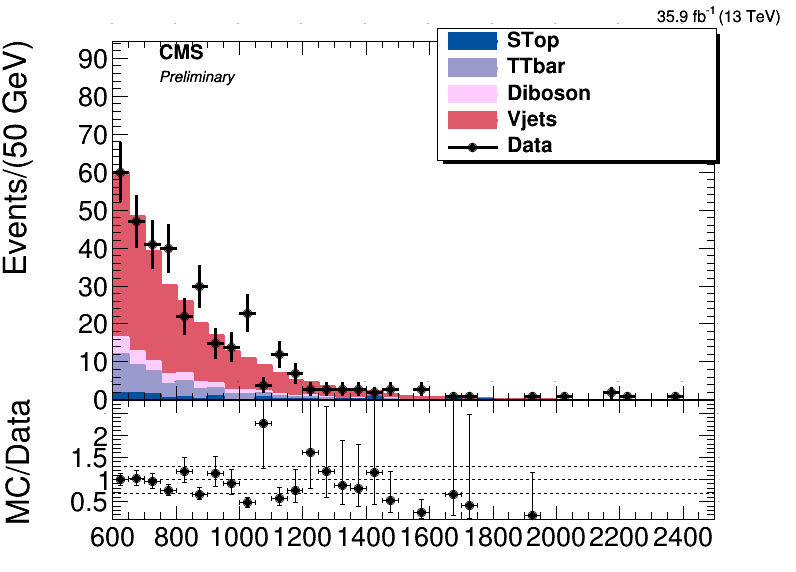

In [18]:
c1 = r.TCanvas("c1", "canvas", 800, 600)
c1.SetLogy(0)
CMS_lumi.lumi_13TeV = "35.9 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"

CMS_lumi.relPosX = 0.05

rp = r.TRatioPlot(stack, hData);
#c.SetTicks(0, 1);
rp.Draw();
rp.GetLowerRefYaxis().SetTitle("MC/Data");
rp.GetUpperRefYaxis().SetTitle("Events/(50 GeV)");
rp.GetLowerRefXaxis().SetTitle("M_{ww}");
rp.GetLowerRefGraph().SetMinimum(0.1);
rp.GetLowerRefGraph().SetMaximum(2.8);

rp.SetLeftMargin(0.14);
# rp.SetRightMargin(0.05);
# rp.SetUpTopMargin(0.05);
# rp.SetSeparationMargin(0.005);
# rp.SetLowBottomMargin(0.46);

# rp.Draw("errasymfhidelow");
# rp.SetSplitFraction(0.10);
# rp.GetLowYaxis().SetNdivisions(4);
# rp.GetLowerRefYaxis().SetTitle("Pred./Data");
# rp.GetLowerRefGraph().SetMinimum(1.5);
# rp.GetLowerRefGraph().SetMaximum(0.5);
# rp.GetLowerRefYaxis().SetRangeUser(0.5, 1.5);
    
    
rp.SetSeparationMargin(0.0)
leg.Draw()

CMS_lumi.CMS_lumi(c1, 4, 11)
c1.Update();
c1.Draw()
c1.SaveAs("WV_Cross_Check_DataMC_WithWjet_Corr_38bins.png")
c1.SaveAs("WV_Cross_Check_DataMC_WithWjet_Corr_38bins.pdf")

# Data/MC with 4 bins

In [19]:
c1.Clear()
fin_Wjet_MC = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")
fin_VV = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VV.root")
fin_TTbar = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_TTbar.root")
fin_STop = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_STop.root")
fin_Data = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_04_06_09h22/HaddedFiles/Hadds_for_BkgEstimation/WWTree_data_golden.root")

treeIn_Wjet_MC = fin_Wjet_MC.Get("otree")
treeIn_VV = fin_VV.Get("otree")
treeIn_TTbar = fin_TTbar.Get("otree")
treeIn_STop = fin_STop.Get("otree")
treeIn_Data = fin_Data.Get("otree")

In [20]:
hModel_Sig_new.SetMarkerColor(r.TColor.GetColor(222,90,106))
hModel_Sig_new.SetLineColor(r.TColor.GetColor(222,90,106))
hModel_Sig_new.SetFillColor(r.TColor.GetColor(222,90,106))
hModel_Sig_new.SetLineWidth(3)
hModel_Sig_new.SetMarkerSize(1)

hWjets_MC = r.TH1D("hWjets_MC","",4,600,2500)
hWjets_MC.SetMarkerColor(r.TColor.GetColor(250,202,255))
hWjets_MC.SetLineColor(r.TColor.GetColor(250,202,255))
hWjets_MC.SetFillColor(r.TColor.GetColor(250,202,255))
hWjets_MC.SetLineWidth(3)
hWjets_MC.SetMarkerSize(1)

hVV = r.TH1D("hVV","",4,600,2500)
hVV.SetMarkerColor(r.TColor.GetColor(250,202,255))
hVV.SetLineColor(r.TColor.GetColor(250,202,255))
hVV.SetFillColor(r.TColor.GetColor(250,202,255))
hVV.SetLineWidth(3)
hVV.SetMarkerSize(1)

hTTbar = r.TH1D("hTTbar","",4,600,2500)
hTTbar.SetMarkerColor(r.TColor.GetColor(155,152,204))
hTTbar.SetLineColor(r.TColor.GetColor(155,152,204))
hTTbar.SetFillColor(r.TColor.GetColor(155,152,204))
hTTbar.SetLineWidth(3)
hTTbar.SetMarkerSize(1)

hSTop = r.TH1D("hSTop","",4,600,2500)
hSTop.SetMarkerColor(r.TColor.GetColor(0,84,159))
hSTop.SetLineColor(r.TColor.GetColor(0,84,159))
hSTop.SetFillColor(r.TColor.GetColor(0,84,159))
hSTop.SetLineWidth(3)
hSTop.SetMarkerSize(1)

hData = r.TH1D("hData","",4,600,2500)
hData.SetMarkerColor(1)
hData.SetLineColor(1)
#hData.SetFillColor(1)
hData.SetLineWidth(3)
hData.SetMarkerSize(1)

treeIn_Wjet_MC.Draw("mass_lvj_type0_PuppiAK8>>hWjets_MC",cutString_SideBand)
treeIn_VV.Draw("mass_lvj_type0_PuppiAK8>>hVV",cutString_SideBand)
treeIn_TTbar.Draw("mass_lvj_type0_PuppiAK8>>hTTbar",cutString_SideBand)
treeIn_STop.Draw("mass_lvj_type0_PuppiAK8>>hSTop",cutString_SideBand)

#cutString_SigData =  "((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so_corr>55) && (PuppiAK8_jet_mass_so_corr<65)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && (vbf_maxpt_jj_m>800) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_SigData_Data   =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) && (PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"

cutString_SideBand_Data  =  "((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800 && vbf_maxpt_jj_m>800 ) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && (((PuppiAK8_jet_mass_so_corr>40)&&(PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>105)&&(PuppiAK8_jet_mass_so_corr<150))) && (mass_lvj_type0_PuppiAK8>600 && mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"



treeIn_Data.Draw("mass_lvj_type0_PuppiAK8>>hData",cutString_SideBand_Data)

343L

In [21]:
leg.Clear();
stack = r.THStack()

stack.Add(hSTop,"F")
stack.Add(hTTbar,"F")
stack.Add(hVV,"F")
#stack.Add(hModel_Sig,"F")
stack.Add(hModel_Sig_new,"F")

leg.AddEntry(hSTop,"STop")
leg.AddEntry(hTTbar,"TTbar")
leg.AddEntry(hVV,"Diboson")
#leg.AddEntry(hModel_Sig,"Wjets")
leg.AddEntry(hModel_Sig_new,"Wjets")
leg.AddEntry(hData,"Data")

#stack.SetMinimum(0.001)
#stack.SetMaximum(90.0)
stack.SetMaximum(400.0)

stack.Draw("hist")
hData.Draw("same hist")
leg.Draw()


#c1.Draw()

35.9 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file WV_Cross_Check_DataMC_WithWjet_Corr_4bins.png has been created
Info in <TCanvas::Print>: pdf file WV_Cross_Check_DataMC_WithWjet_Corr_4bins.pdf has been created


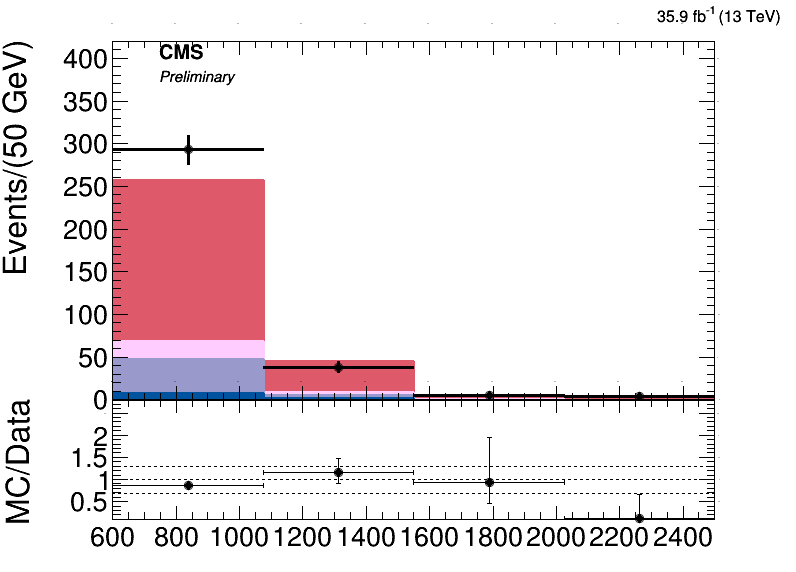

In [22]:
c1 = r.TCanvas("c1", "canvas", 800, 600)
c1.SetLogy(0)
CMS_lumi.lumi_13TeV = "35.9 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"

CMS_lumi.relPosX = 0.05

rp = r.TRatioPlot(stack, hData);
#c.SetTicks(0, 1);
rp.Draw();
rp.GetLowerRefYaxis().SetTitle("MC/Data");
rp.GetUpperRefYaxis().SetTitle("Events/(50 GeV)");
rp.GetLowerRefXaxis().SetTitle("M_{ww}");
rp.GetLowerRefGraph().SetMinimum(0.1);
rp.GetLowerRefGraph().SetMaximum(2.8);

rp.SetLeftMargin(0.14);
# rp.SetRightMargin(0.05);
# rp.SetUpTopMargin(0.05);
# rp.SetSeparationMargin(0.005);
# rp.SetLowBottomMargin(0.46);

# rp.Draw("errasymfhidelow");
# rp.SetSplitFraction(0.10);
# rp.GetLowYaxis().SetNdivisions(4);
# rp.GetLowerRefYaxis().SetTitle("Pred./Data");
# rp.GetLowerRefGraph().SetMinimum(1.5);
# rp.GetLowerRefGraph().SetMaximum(0.5);
# rp.GetLowerRefYaxis().SetRangeUser(0.5, 1.5);
    
    
rp.SetSeparationMargin(0.0)

CMS_lumi.CMS_lumi(c1, 4, 11)
c1.Update();
c1.Draw()
c1.SaveAs("WV_Cross_Check_DataMC_WithWjet_Corr_4bins.png")
c1.SaveAs("WV_Cross_Check_DataMC_WithWjet_Corr_4bins.pdf")

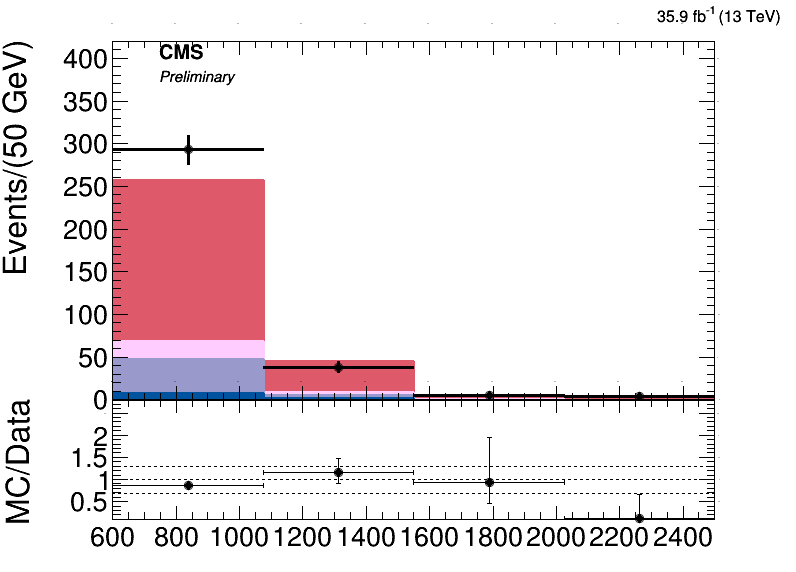

In [23]:
c1.SetLogy(1)
c1.Draw()

In [24]:
print "Program is done..."

Program is done...
